### Problem Statement

In this we need to determine, The chances of getting the admission in to the UCLA based on the students performance on previous grades such as 'Gre','TOEFL Score','CGPA' etc., on which the student will get the admission in to the UCLA or not.

### Steps involved 
1. Data Loading
2. Data Preprocessing.
3. Exploratory Data Analysis.
4. Feature Engineering.
5. Feature selection.
6. Model Building.
7. Model Evaluation.
8. Predictions.

### Predicting Admission in to UCLA 

### 1. Data Loading or Data Collection

Data Loading or a Data Collection is a strategy, where you can get the data from the different websites in different formats of the data is loaded in to local machine based on the problem statement.  

##### Import the libraries


In [1]:
import pandas as pd
import numpy as np

In [2]:
#Read the data
data=pd.read_csv('admission_predict.csv.txt')

In [3]:
#Load the data
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
#Last five rows of the data
data.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


### 2. Exploratory data Analysis

In [5]:
#size or shape of the data
print('Number of Observations: {}'.format(data.shape[0]))
print('Number of variables: {}'.format(data.shape[1]))

Number of Observations: 500
Number of variables: 9


In [6]:
#Details about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [7]:
#Describe
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


In [8]:
#Check the data type of each variable
data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [9]:
#Check correlation
data.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


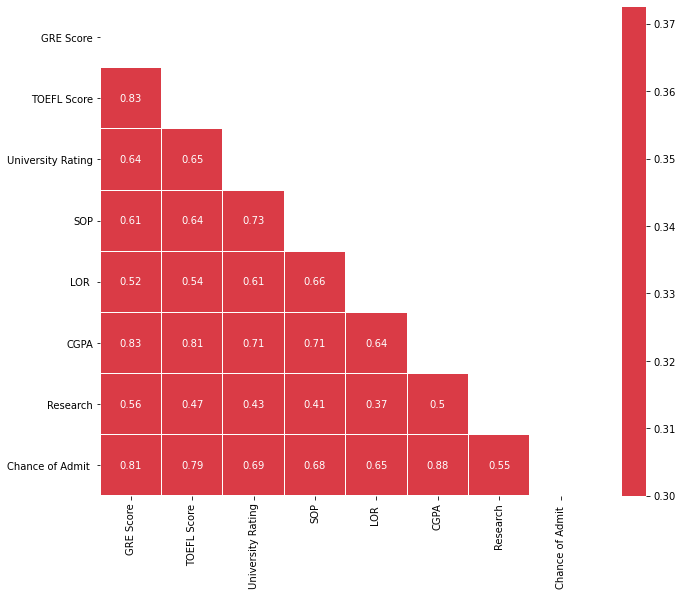

In [10]:
#Visualize the correaltion with heatmap
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(11,9))
cmap=sns.diverging_palette(220,10, as_cmap=True)
corr=data.drop('Serial No.',axis=1).corr()
#Generate a mask
mask=np.triu(np.ones_like(corr,dtype=bool))
#Let's visualize with heatmap
sns.heatmap(corr,annot=True,mask=mask,cmap=cmap,center=0,vmax=0.3,linewidths=0.05)
plt.show()

From above heatmap, Each and Every data variable are correlated with ecah other, Let's get more deep inside in to data

In [11]:
#Check any null values are present in the data
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [12]:
#Get the info about the positive values,negitive values,Unique values etc
class numeric_data():
    def __init__(self):
        print('Numeric Data Object is created')
        
    def get_numeric_data(self,data):
        
        df_num=data._get_numeric_data()
        df_num_data=pd.DataFrame()
        i=0
        
        for c in df_num.columns:
            df_num_data.loc[c,'No of Positive Values']=df_num[df_num[c] > 0].shape[0]
            df_num_data.loc[c,'No of Negitive values']=df_num[df_num[c] < 0].shape[0]
            df_num_data.loc[c,'Unique values']=len(df_num[c].unique())
            df_num_data.loc[c,'Zero values']=df_num[df_num[c] == 0].shape[0]
            df_num_data.loc[c,'Positive infinity values']=df_num[df_num[c] ==np.inf].shape[0]
            df_num_data.loc[c,'Negitve infinity values']=df_num[df_num[c] == -np.inf].shape[0]
            
            i=i+1
            
        return df_num_data

In [13]:
numeric_data=numeric_data()

Numeric Data Object is created


In [14]:
numeric_data.get_numeric_data(data)

,No of Positive Values,No of Negitive values,Unique values,Zero values,Positive infinity values,Negitve infinity values
Serial No.,500.0,0.0,500.0,0.0,0.0,0.0
GRE Score,500.0,0.0,49.0,0.0,0.0,0.0
TOEFL Score,500.0,0.0,29.0,0.0,0.0,0.0
University Rating,500.0,0.0,5.0,0.0,0.0,0.0
SOP,500.0,0.0,9.0,0.0,0.0,0.0
LOR,500.0,0.0,9.0,0.0,0.0,0.0
CGPA,500.0,0.0,184.0,0.0,0.0,0.0
Research,280.0,0.0,2.0,220.0,0.0,0.0
Chance of Admit,500.0,0.0,61.0,0.0,0.0,0.0


Get the outliers count in each variables, Outliers are highly impacted on the output of the data. These are caused due to the Uneven Distributions,approximate calculations,inacurate data etc. These are reasons for forming of outliers.
Some Algorithems are sensitive to the outliers because it uses euclidean distance to check the distances between the data points.
1. Linear Regression.
2. KNeighbors classifier
3. Support vector machine
4. Naive bayes
5. Logistic Regression.

In [15]:
class outlier_object():
    def __init__(self):
        print('Outlier object is created')
    
    def _iqr(self,x):
        """This is a private methos, gives a inter quartile range of the variables
        """
        
        return x.quantile(q=0.75)-x.quantile(q=0.25)
    
    def _outlier_count(self,x):
        """This is a private method , give you a outliers count in each variables
        """
        upper_out=x.quantile(q=0.75) + 1.5*self._iqr(x)
        lower_out=x.quantile(q=0.25) - 1.5*self._iqr(x)
        
        return len(x[x > upper_out]) + len(x[x < lower_out])
    
    def get_outlier_data(self,data):
        df_num=data._get_numeric_data()
        df_num_data=pd.DataFrame()
        i=0
        for c in df_num.columns:
            df_num_data.loc[c,'Outliers']=self._outlier_count(df_num[c])
        
        return df_num_data

In [16]:
outlier=outlier_object()

Outlier object is created


In [17]:
outlier.get_outlier_data(data)

,Outliers
Serial No.,0.0
GRE Score,0.0
TOEFL Score,0.0
University Rating,0.0
SOP,0.0
LOR,1.0
CGPA,0.0
Research,0.0
Chance of Admit,2.0


In [18]:
#Drop the unessacry column 'Serial No.'
df=data.drop('Serial No.',axis=1)

In [19]:
def plot_data(variable,data):
    plt.figure(figsize=(9,5))
    g=sns.distplot(data[variable])
    g.set_title(variable)
    return g

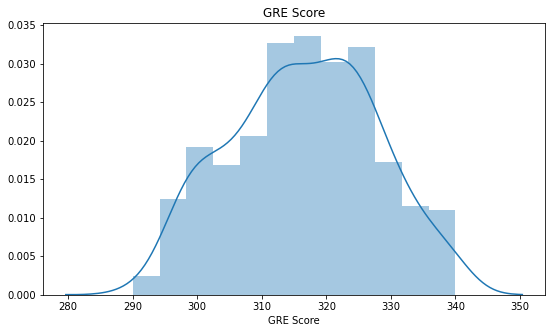

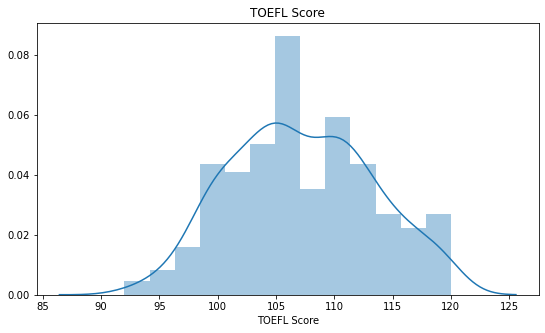

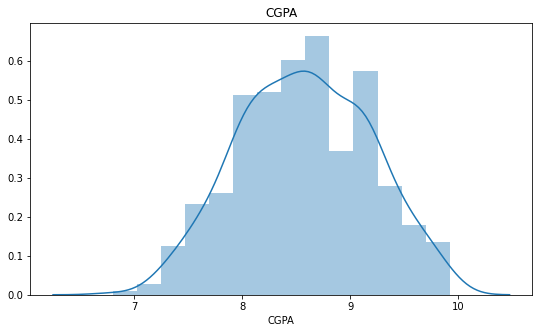

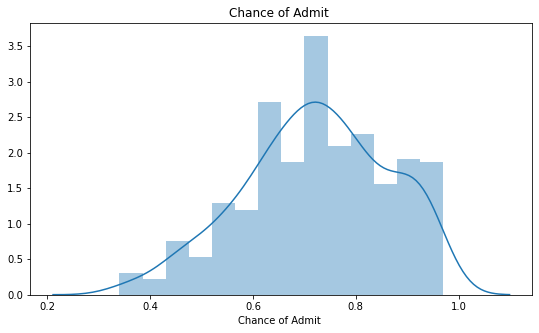

In [20]:
df_1=['GRE Score', 'TOEFL Score','CGPA', 'Chance of Admit ']
for i in df_1:
    plot_data(i,data)

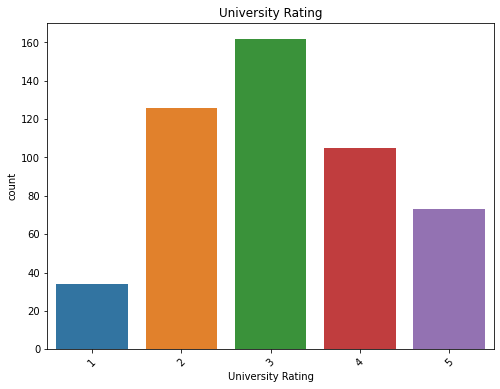

In [21]:
plt.figure(figsize=(8,6))
g=sns.countplot(df['University Rating'])
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title('University Rating')
plt.show()

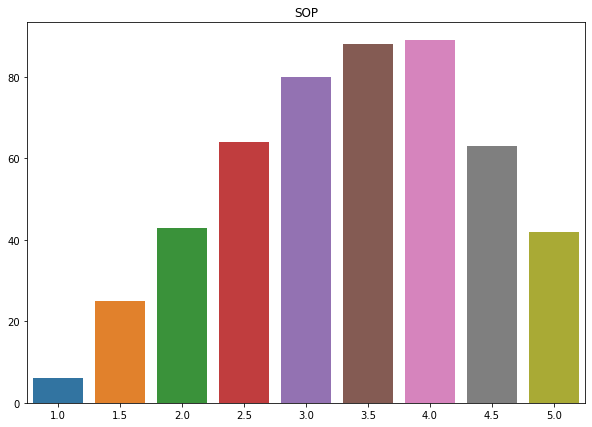

In [22]:
plt.figure(figsize=(10,7))
fg=sns.barplot(x=df['SOP'].value_counts().index,y=df['SOP'].value_counts().values)
fg.set_title('SOP')
plt.show()

In [23]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

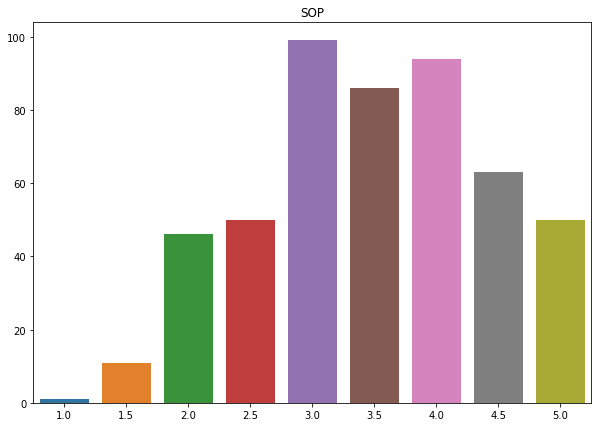

In [24]:
plt.figure(figsize=(10,7))
fg=sns.barplot(x=df['LOR '].value_counts().index,y=df['LOR '].value_counts().values)
fg.set_title('SOP')
plt.show()

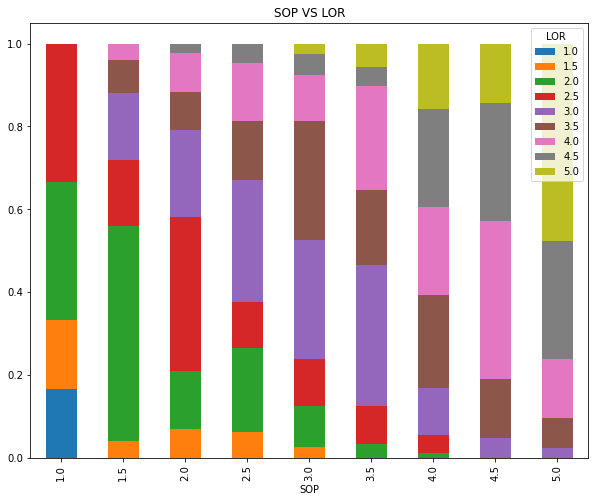

In [25]:
score=pd.crosstab(df['SOP'],df['LOR '])
score.div(score.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(10,8))
plt.title('SOP VS LOR')
plt.show()

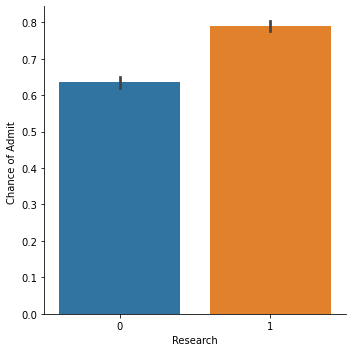

In [26]:
sns.catplot(x='Research',y='Chance of Admit ',data=df,kind='bar')

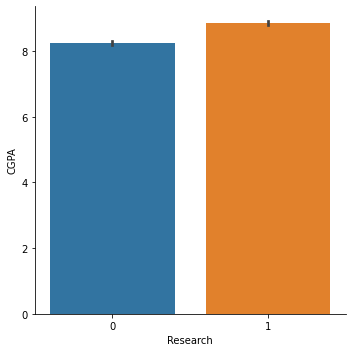

In [27]:
sns.catplot(x='Research',y='CGPA',data=df,kind='bar')

In [28]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [29]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

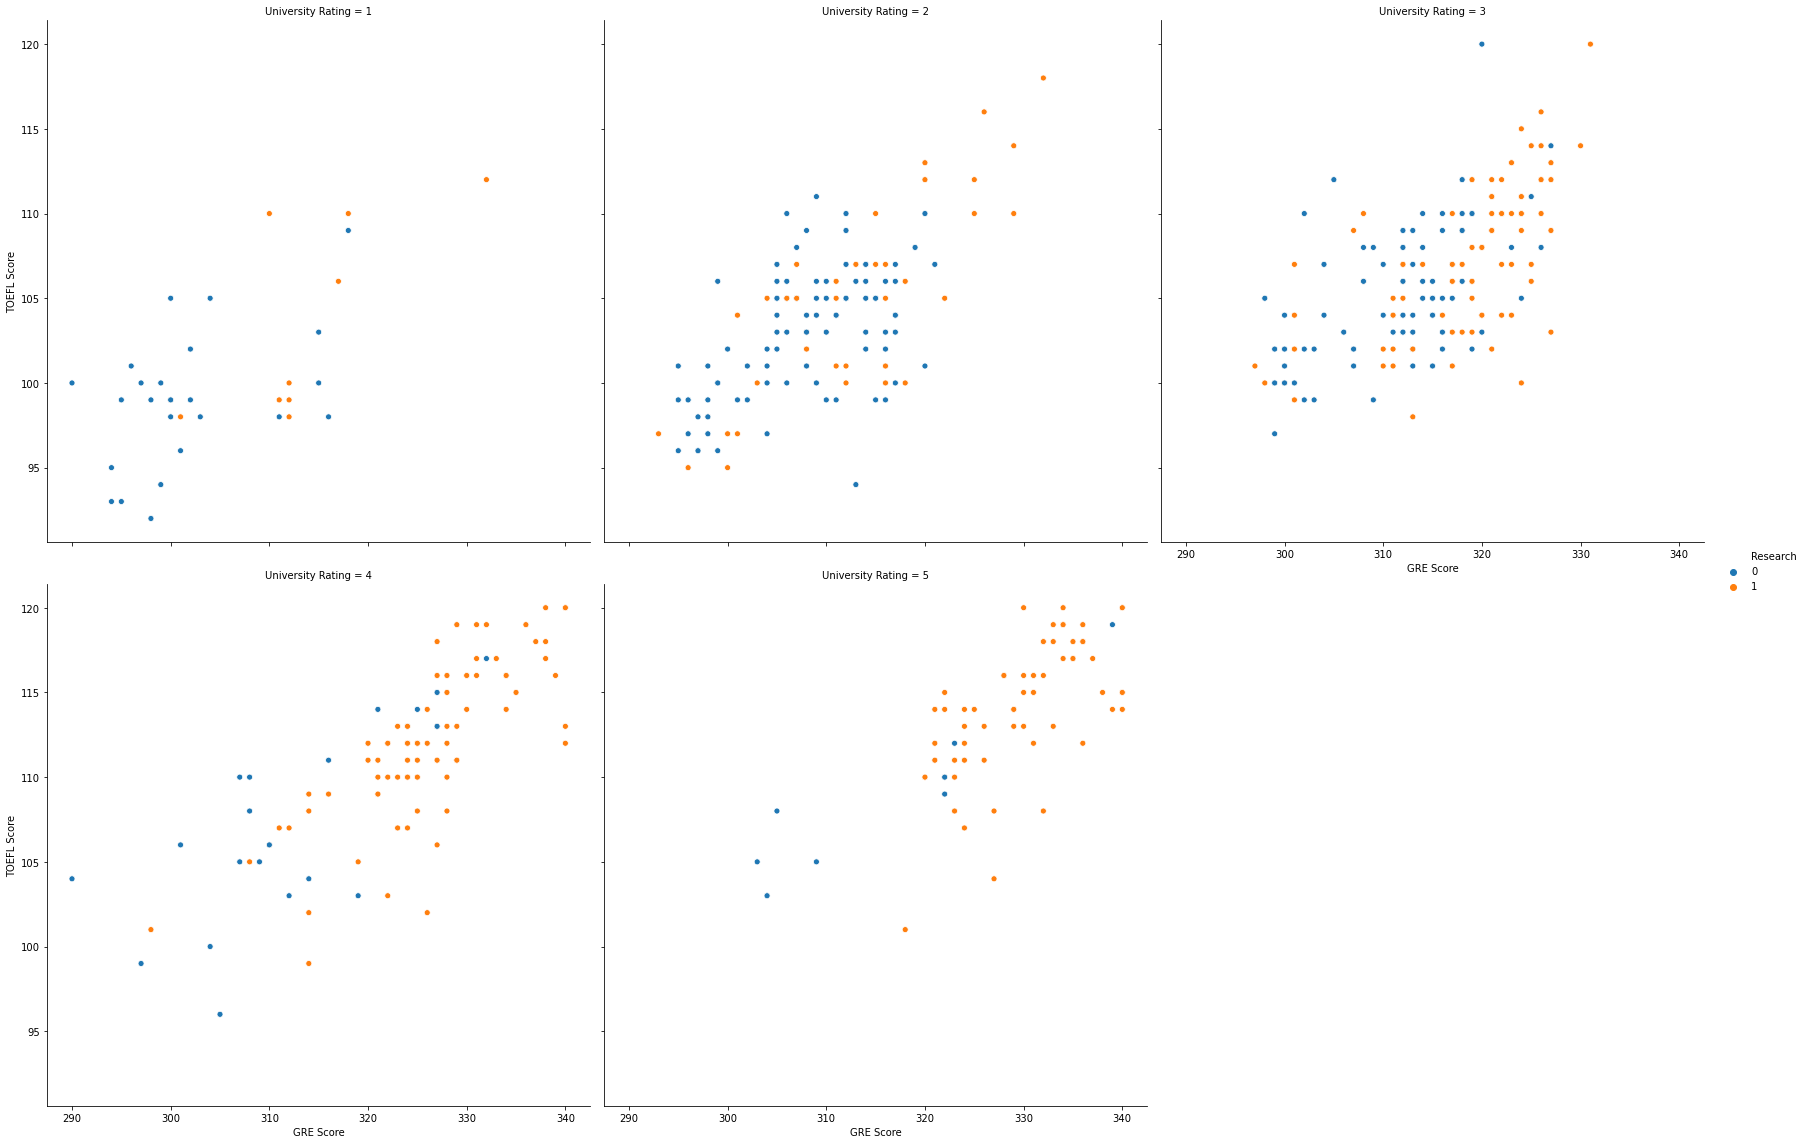

In [30]:
sns.relplot(x='GRE Score',y='TOEFL Score',hue='Research',data=df,col='University Rating',col_wrap=3,height=8)

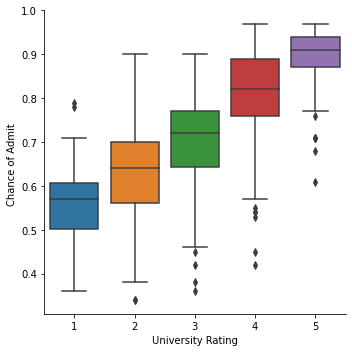

In [31]:
sns.catplot(x='University Rating',y='Chance of Admit ',data=df,kind='box')

In [32]:
def box_plot(variable,data):
    plt.figure(figsize=(7,5))
    sns.boxplot(x=data[variable])
    plt.title(variable)
    plt.show()


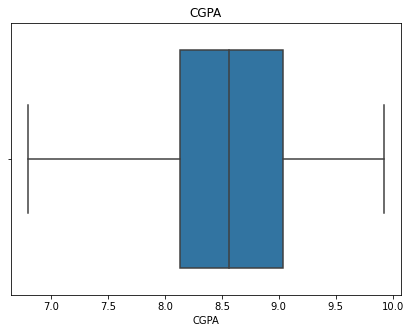

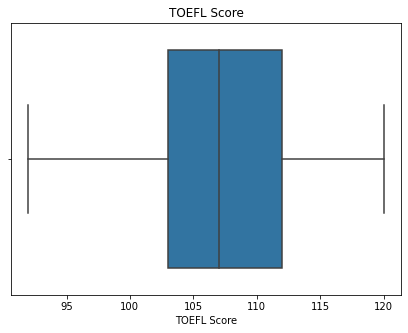

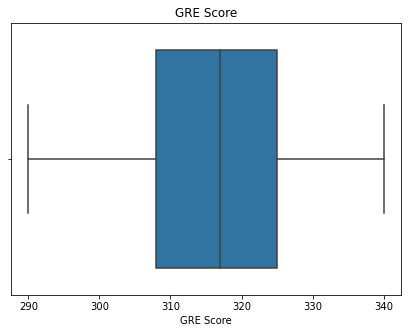

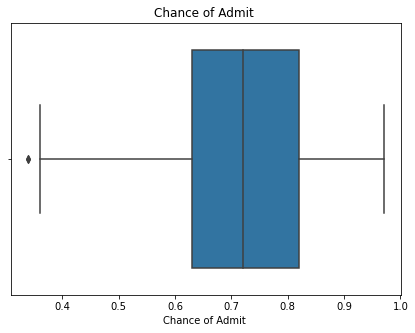

In [33]:
for feature in df[['CGPA','TOEFL Score','GRE Score','Chance of Admit ']]:
    box_plot(feature,df)

In [34]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [35]:
#Split the dataset in to x and y
x=df.drop('Chance of Admit ',axis=1)
y=df['Chance of Admit ']

### Feature Selection

Feature selection is a process where you can automatically or manually select those features which contributes most to your prediction variable or output in which you are intrested in.Having irrevalent features in your dataset chances of getting the low accuracy of the models and make your model learn based on the irrevalent features.

Methods in Feature Selection.
1. Filter method.
A. Pearson's Correlation.
B. LDA (Linear Discriminent analysis)
C. ANOVA
D. Chi-Square

2. Wrapper method.
A. Forward Selection.
B. Backward Selection.
C. Recursive feature elimination.
    
3. Embedded method.

Embedde methods combine the qualities of both 'Filter methods' and 'Wrapper methods'.it's implemented by algorithems that have their own built-in features selection methods.

In [36]:
from sklearn.tree import ExtraTreeRegressor
extra=ExtraTreeRegressor()
extra.fit(x,y)

ExtraTreeRegressor()

In [38]:
extra_best=pd.DataFrame(extra.feature_importances_,columns=['Value'],index=x.columns)

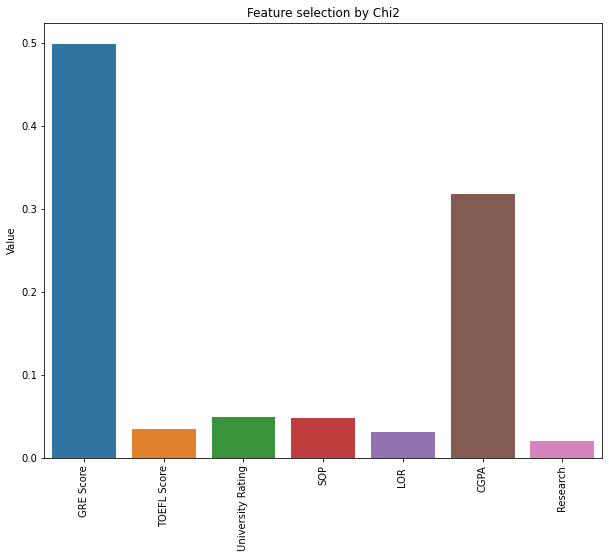

In [40]:
plt.figure(figsize=(10,8))
g=sns.barplot(x=extra_best.index,y=extra_best['Value'])
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title('Feature selection by Chi2')
plt.show()

GRE Score ----> 0.14219598
TOEFL Score ----> 0.14412482
University Rating ----> 0.13828655
SOP ----> 0.12885503
LOR  ----> 0.1306179
CGPA ----> 0.18709703
Research ----> 0.1288227


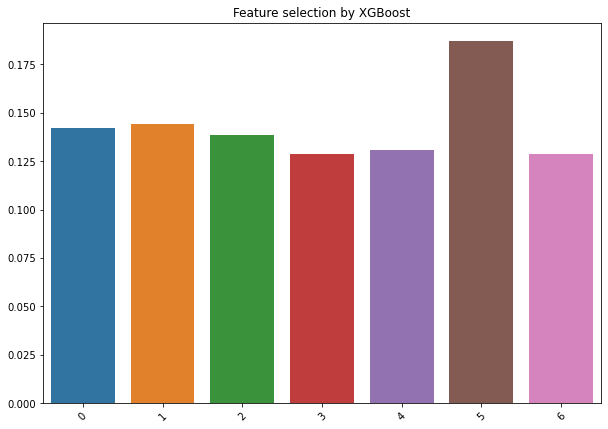

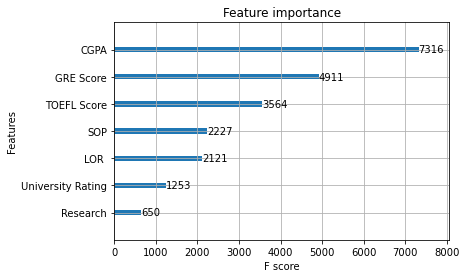

In [41]:
#Feature selection by xgboost
import xgboost
from xgboost import plot_importance
xgb=xgboost.XGBClassifier()
xgb.fit(x,y)

features=xgb.feature_importances_
columns=x.columns

for i,j in enumerate(features):
    print(columns[i],"---->",j)
    
plt.figure(figsize=(10,7))
fg=sns.barplot([x for x in range(len(features))],features)
fg.set_xticklabels(fg.get_xticklabels(),rotation=45)
fg.set_title('Feature selection by XGBoost')
plt.show()

plot_importance(xgb)

In [42]:
#Split the data in to train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Feature transformation

Feature treansformation is a technique which is used to scaling down the all variables in our dataset in to the same vectors.

Methods of Feature transformation.
1. Standard Scaler
2. MinMaxScaler
3. Logarthemic transformation.
4. Boxcox transformation.

In [43]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [44]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(400, 7) (100, 7) (400,) (100,)


### Model Building.

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,cross_val_score,KFold,ShuffleSplit

In [46]:
#Create a model function
def select_model(x,y):
    models={
        'Linear Regression':{'model':LinearRegression(),'parameters':{'normalize':[True,False]}},
    'Lasso': {'model':Lasso(),'parameters':{'alpha':[0.001,0.002,0.01,0.02,0.03,0.04,0.1,0.2,0.3,0.5]}},
    'Ridge': {'model':Ridge(solver='auto'),'parameters':{'alpha':[0.001,0.002,0.01,0.02,0.03,0.04,0.1,0.2,0.3,0.5]}},
    'DecisionTreeRegressor':{'model':DecisionTreeRegressor(criterion='mse',max_features='auto'),'parameters':{'max_depth':[1,3,5,7,8,10,12,14]}},
    'KNeighborsRegressor':{'model':KNeighborsRegressor(weights='uniform',algorithm='auto'),'parameters':{'n_neighbors':[2,4,6,8,10,12,14]}},
    'RandomForestRegressor':{'model':RandomForestRegressor(criterion='mse'),'parameters':{'n_estimators':[20,40,60,80,100,200,400,600,800,1000],'max_features':['auto','sqrt','log2']}},
    'SVM':{'model':SVR(gamma='scale'),'parameters':{'kernel':['rbf','linear','poly'],'C':[0.04,0.1,0.3,0.5,0.7,1,2,4,6,8]}},
    }
    
    scores=[]
    cv_shuffle=ShuffleSplit(n_splits=10,test_size=0.2,random_state=0)
    
    for model_name,model_params in models.items():
        gs=GridSearchCV(model_params['model'],model_params['parameters'],cv=cv_shuffle,return_train_score=False)
        gs.fit(x,y)
        
        scores.append({'model':model_name,'Best_parameters':gs.best_params_,'Best_Score':gs.best_score_})
        
    return pd.DataFrame(scores,columns=['model','Best_parameters','Best_Score'])
        

In [47]:
select_model(x_train,y_train)

,model,Best_parameters,Best_Score
0,Linear Regression,{'normalize': True},0.808487
1,Lasso,{'alpha': 0.001},0.809894
2,Ridge,{'alpha': 0.5},0.808582
3,DecisionTreeRegressor,{'max_depth': 3},0.707241
4,KNeighborsRegressor,{'n_neighbors': 14},0.775471
5,RandomForestRegressor,"{'max_features': 'sqrt', 'n_estimators': 800}",0.799267
6,SVM,"{'C': 0.1, 'kernel': 'linear'}",0.782684


In [49]:
#Model building without standardization
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [50]:
#Create a model function
def select_model(x,y):
    models={
        'Linear Regression':{'model':LinearRegression(),'parameters':{'normalize':[True,False]}},
    'Lasso': {'model':Lasso(),'parameters':{'alpha':[0.001,0.002,0.01,0.02,0.03,0.04,0.1,0.2,0.3,0.5]}},
    'Ridge': {'model':Ridge(solver='auto'),'parameters':{'alpha':[0.001,0.002,0.01,0.02,0.03,0.04,0.1,0.2,0.3,0.5]}},
    'DecisionTreeRegressor':{'model':DecisionTreeRegressor(criterion='mse',max_features='auto'),'parameters':{'max_depth':[1,3,5,7,8,10,12,14]}},
    'KNeighborsRegressor':{'model':KNeighborsRegressor(weights='uniform',algorithm='auto'),'parameters':{'n_neighbors':[2,4,6,8,10,12,14]}},
    'RandomForestRegressor':{'model':RandomForestRegressor(criterion='mse'),'parameters':{'n_estimators':[20,40,60,80,100,200,400,600,800,1000],'max_features':['auto','sqrt','log2']}},
    'SVM':{'model':SVR(gamma='scale'),'parameters':{'kernel':['rbf','linear','poly'],'C':[0.04,0.1,0.3,0.5,0.7,1,2,4,6,8]}},
    }
    
    scores=[]
    cv_shuffle=ShuffleSplit(n_splits=10,test_size=0.2,random_state=0)
    
    for model_name,model_params in models.items():
        gs=GridSearchCV(model_params['model'],model_params['parameters'],cv=cv_shuffle,return_train_score=False)
        gs.fit(x,y)
        
        scores.append({'model':model_name,'Best_parameters':gs.best_params_,'Best_Score':gs.best_score_})
        
    return pd.DataFrame(scores,columns=['model','Best_parameters','Best_Score'])

In [51]:
select_model(x_train,y_train)

,model,Best_parameters,Best_Score
0,Linear Regression,{'normalize': True},0.808487
1,Lasso,{'alpha': 0.001},0.811189
2,Ridge,{'alpha': 0.5},0.808783
3,DecisionTreeRegressor,{'max_depth': 3},0.707110
4,KNeighborsRegressor,{'n_neighbors': 12},0.701498
5,RandomForestRegressor,"{'max_features': 'log2', 'n_estimators': 1000}",0.799539
6,SVM,"{'C': 1, 'kernel': 'linear'}",0.791531


From the above predicted results , The lasso regression perform well as compared to the other algorithem without standardization

In [56]:
#Using cross val score for gaining high accuracy
cross_val=cross_val_score(Lasso(alpha=0.001),x_train,y_train,cv=10)
print('Highest Score: {}%'.format(round(sum(cross_val)*100/len(cross_val)),3))

Highest Score: 81.0%


In [58]:
#Splitting the data in to train and test samples
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [68]:
#Create a Lasso Regression model
ls=Lasso(alpha=0.001)
ls.fit(x_train,y_train)
ls.score(x_test,y_test)

0.8237897988383995

### Predictions

In [69]:
#Prediction 1
#Predict the values using our train model
#Input in the form 'GRE Score','TOEFL Score','University Rating','SOP','LOR','CGPA','Research'
#Let's predict the chances of getting the admission in to the UCLA

print('Chances of getting the admission in to the UCLA : {}%'.format(round(ls.predict([[337,118,4,4.5,4.5,9.65,1]])[0]*100,3)))

Chances of getting the admission in to the UCLA : 95.151%


In [70]:
#Prediction 2
print('Chances of getting the admission in to the UCLA : {}%'.format(round(ls.predict([[324,107,4,4.0,4.5,8.87,1]])[0]*100,3)))

Chances of getting the admission in to the UCLA : 80.05%
